In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
mind = pd.read_csv('raw_mindwave.csv').set_index('time').drop(columns=['raw', 'attention', 'meditation'])
muse = pd.read_csv('raw_muse.csv').set_index('time').drop(columns=['raw'])

mind.index = pd.to_datetime(mind.index)
muse.index = pd.to_datetime(muse.index)

mind_df = mind.groupby([mind.index.minute, mind.index.second, mind.index.microsecond//1e5]).mean()
muse_df = muse.groupby([muse.index.minute, muse.index.second, muse.index.microsecond//1e5]).mean() ** 2 # <<============ เพิ่งเพิมใน muse

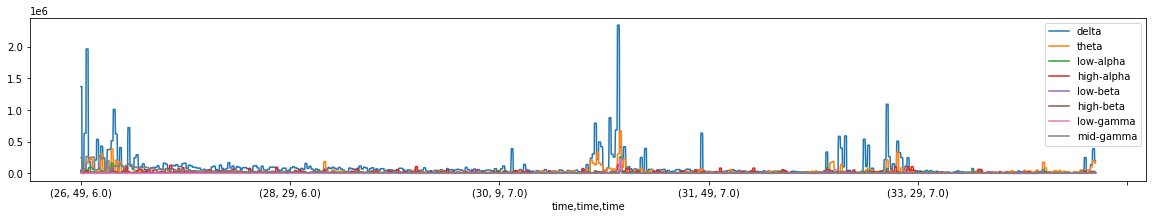

In [28]:
mind_df.plot(figsize=(20, 3))

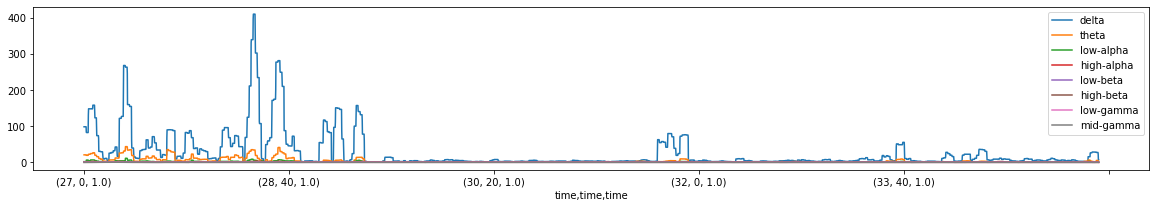

In [29]:
muse_df.plot(figsize=(20, 3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E5ECF2470>,
      dtype=object)

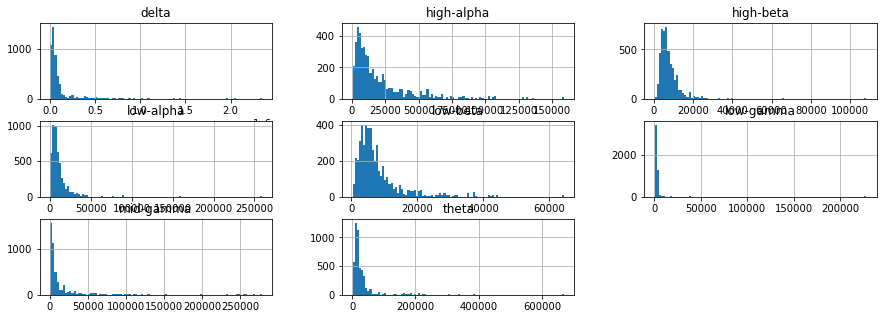

In [30]:
def normalize(df):
    return df

mind_df = normalize(mind_df)
mind_df.hist(bins=100, figsize=(15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E5256FB38>,
      dtype=object)

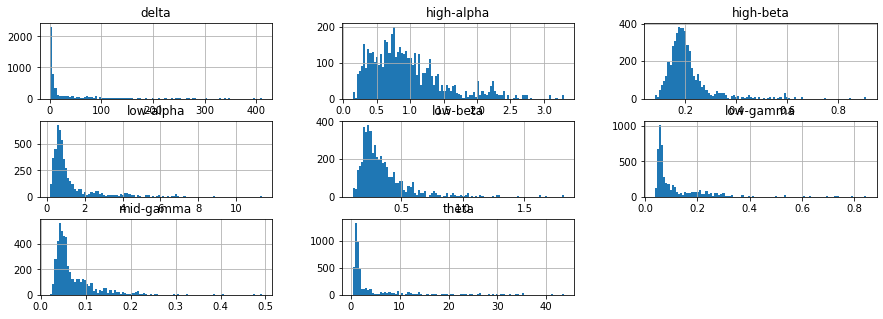

In [31]:
muse_df = normalize(muse_df)
muse_df.hist(bins=100, figsize=(15, 5))

In [32]:
# def map(muse_band, mind_band):
#     z = (muse_band - muse_band.mean())/muse_band.std(ddof=0)
#     # print(muse_band.mean(), muse_band.std(ddof=0))
#     # print(mind_band.mean(), mind_band.std(ddof=0))
#     return z * mind_band.std(ddof=0) + mind_band.mean()

# for col in muse_df.columns:
#     muse_df[col] = map(muse_df[col], mind_df[col])

In [33]:
# np.exp(mind_df).plot(figsize=(20, 5))

In [34]:
# np.exp(muse_df).plot(figsize=(20, 5))

In [35]:
# new = pd.DataFrame()
# new['muse'] = np.exp(muse_df).mean()
# new['mindwave'] = np.exp(mind_df).mean()
# new.plot(figsize=(10, 5))

In [36]:
# new = pd.DataFrame()
# new['mindwave'] = mind_df.reset_index(drop=True).raw
# new['muse'] = muse_df.reset_index(drop=True).raw
# new.mindwave = new.mindwave - new.mindwave.mean()
# new.muse = new.muse - new.muse.mean()
# new.plot(figsize=(20, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E5C996358>,
      dtype=object)

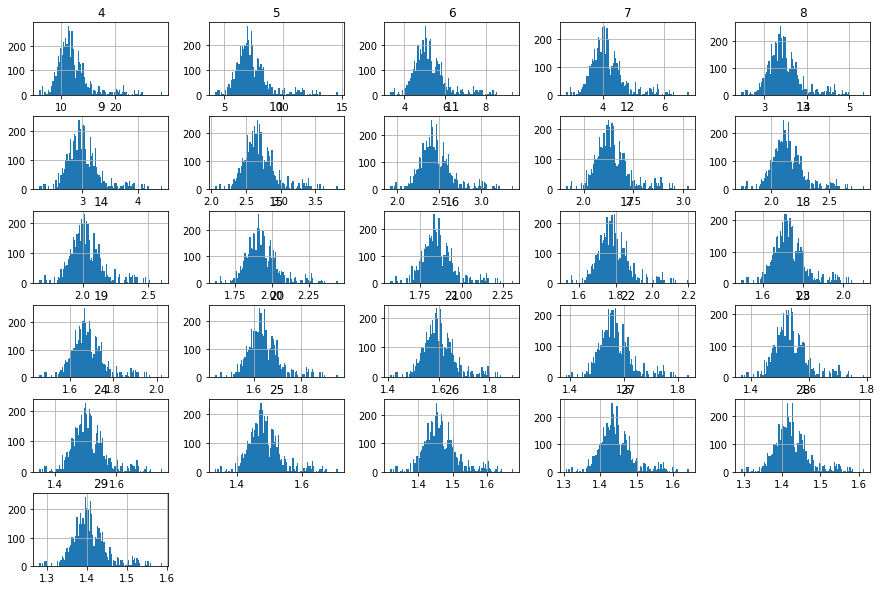

In [37]:
from scipy.stats import kstest

new_df = pd.DataFrame()

for c in np.arange(4, 30):
    new_df[c] = (mind_df[mind_df.columns[1]] ** (1/c))

new_df.hist(bins=100, figsize=(15, 10))